In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.offsetbox import AnchoredText
import cartopy.io.shapereader as shpr

%matplotlib inline

# What area am I interested in

In [2]:
cities=shpr.Reader(shpr.natural_earth(resolution='110m', category='cultural', name='populated_places'))

citNames=list()
citLat=list()
citLon=list()
for i in cities.records():
    citNames.append(i.attributes['NAME'])
    citLat.append(i.attributes['LATITUDE'])
    citLon.append(i.attributes['LONGITUDE'])

C:\Anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/cultural/ne_110m_populated_places.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


In [3]:
import os
os.environ["CARTOPY_USER_BACKGROUNDS"] = "/Users/ajs/compound/ref/"

FileNotFoundError: [Errno 2] No such file or directory: '/Users/ajs/compound/ref/images.json'

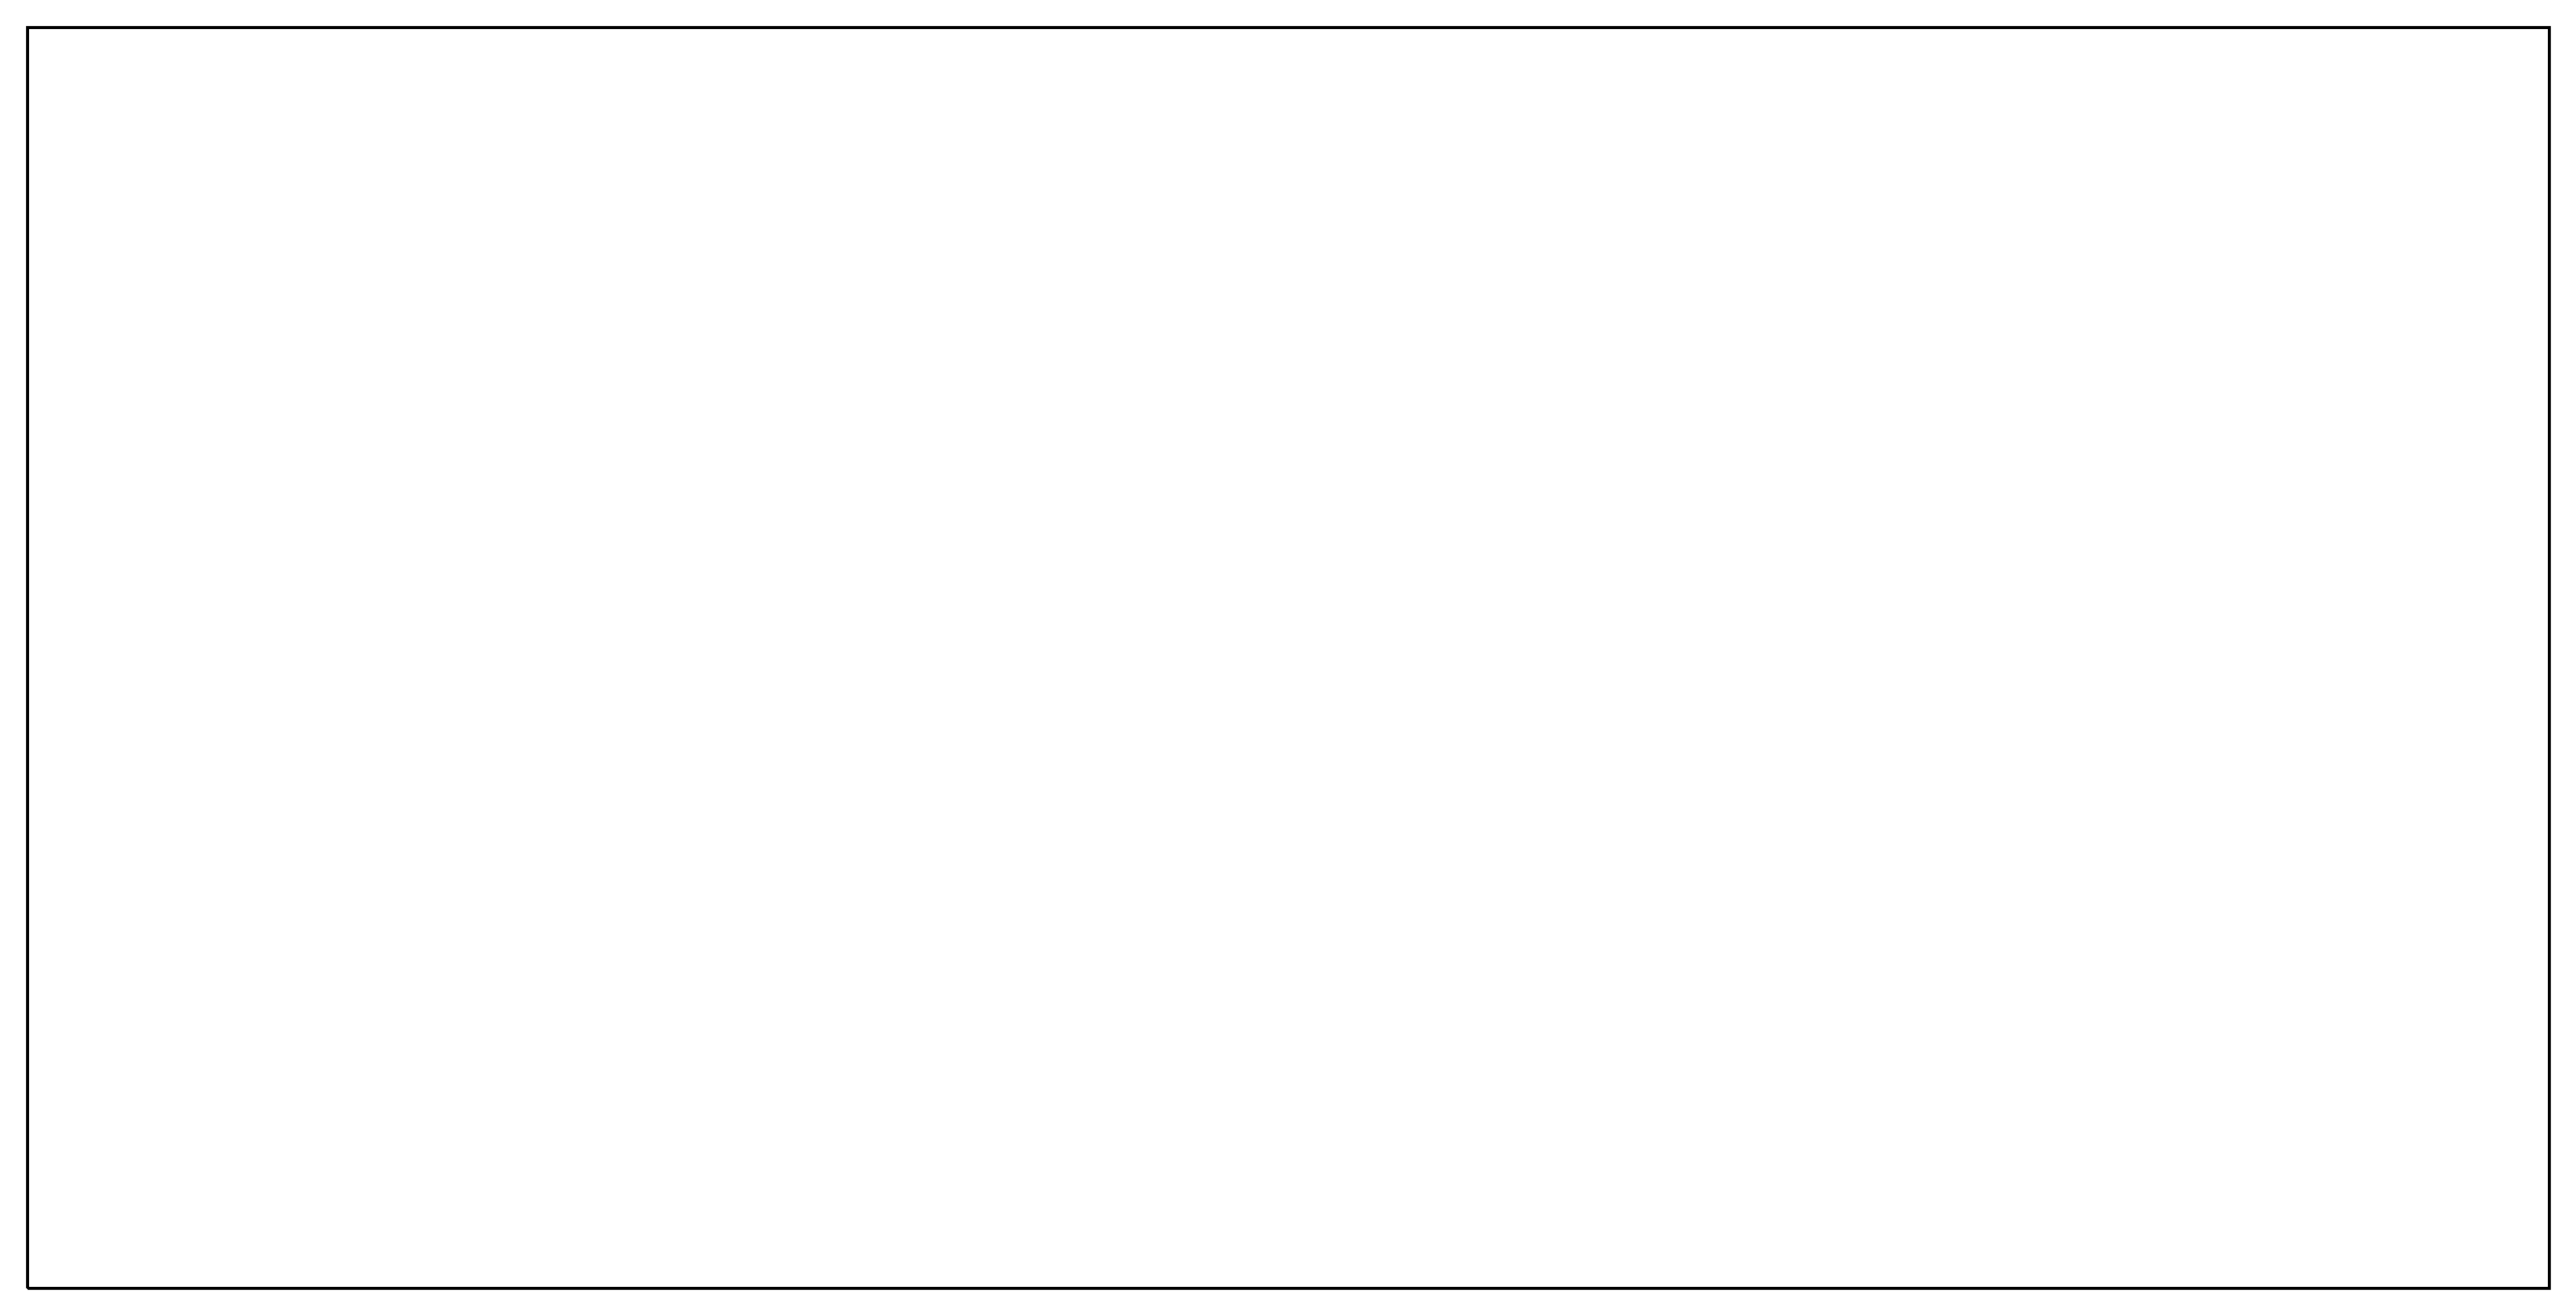

In [4]:
fig=plt.figure(figsize=(12,12), dpi=300)

ax=fig.add_subplot(projection=ccrs.PlateCarree())

ax.background_img(name="NE1", resolution="low")

ax.set_xlim(100,170)
ax.set_ylim(-50,0)

gl=ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle=':')
gl.top_labels=False
gl.left_labels=False


#credit: https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
ax.add_feature(cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces',
        scale='50m',
        facecolor='none'), edgecolor='grey')

ax.add_feature(cfeature.OCEAN) 

ax.coastlines(color='grey')

ax.plot(citLon, citLat, '.', color='black', label=citNames, transform=ccrs.PlateCarree())

ax.add_patch(mpatches.Rectangle(xy=[135, -40], width=20, height=15,
                                edgecolor='red',facecolor='none' ))



# Add a text annotation for the license information to the
    # the bottom right corner.
text = AnchoredText(u"\u00A9" + "Natural Earth; licence: Public Domain",
                        loc=4, prop={'size': 12}, frameon=True)
ax.add_artist(text)

plt.show()